### Inc 5000 2019
List for Inc 500 2019 for Annual list of fastest growing private companies from Inc.com

How the 2019 Inc. 5000 Companies Were Selected:
Companies on the 2019 Inc. 5000 are ranked according to percentage revenue growth from 2015 to 2018. To qualify, companies must have been founded and generating revenue by March 31, 2015. They must be U.S.-based, privately held, for-profit, and independent--not subsidiaries or divisions of other companies--as of December 31, 2018.

The 3 questions that we have in mind before starting the project were thought as if you were to invest money in certain type of business, which one would it be and where. Therefore the 3 main questions are:

1. Which is the hottest industry in 2019 (according to the dataset).
2. What city/state showed most of the industry growth.
3. From what type of companies does growth increased the most.

***

**EDA**

In [1]:
# Library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#plt.style.use('fivethirtyeight')
sns.set(style="whitegrid")

In [2]:
# Load the dataset
df = pd.read_csv('/Users/gonzandrobles/Desktop/csv_files/inc5000-2019.csv')

In [3]:
# Checking first 3 values to get an idea how the dataset looks like
df.head(3)

,_ - rank,Profile,name,url,state,_ - revenue,_ - growth,_ - industry,_ - workers,_ - founded,_ - yrs_on_list,_ - previous_workers,_ - metro,city
0,1,https://www.inc.com/profile/freestar,Freestar,http://freestar.com,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,2015,1,5,Phoenix,Phoenix
1,2,https://www.inc.com/profile/freightwise,FreightWise,http://freightwisellc.com,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,2015,1,8,Nashville,Brentwood
2,3,https://www.inc.com/profile/ceces-veggie,Cece's Veggie Co.,http://cecesveggieco.com,TX,24.9 Million,23880.4852,Food & Beverage,190.0,2015,1,10,Austin,Austin


There is some messy column names that need some changes

In [4]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5012 entries, 0 to 5011
Data columns (total 14 columns):
_ - rank                5012 non-null int64
Profile                 5012 non-null object
name                    5012 non-null object
url                     5012 non-null object
state                   5012 non-null object
_ - revenue             5012 non-null object
_ - growth              5012 non-null float64
_ - industry            5012 non-null object
_ - workers             5011 non-null float64
_ - founded             5012 non-null int64
_ - yrs_on_list         5012 non-null int64
_ - previous_workers    5012 non-null int64
_ - metro               4199 non-null object
city                    5012 non-null object
dtypes: float64(2), int64(4), object(8)
memory usage: 548.3+ KB


In [5]:
# Statistical numbers of the numeric columns
df.describe()

,_ - rank,_ - growth,_ - workers,_ - founded,_ - yrs_on_list,_ - previous_workers
count,5012.000000,5012.000000,5011.000000,5012.000000,5012.000000,5012.000000
mean,2499.628292,454.680059,242.783077,2005.445531,2.813647,111.687151
std,1443.232009,1284.288709,2800.165478,30.310632,2.265986,1073.878175
min,1.000000,52.169100,0.000000,0.000000,1.000000,1.000000
25%,1249.750000,90.562500,22.000000,2003.000000,1.000000,8.000000
50%,2497.500000,157.530650,48.000000,2009.000000,2.000000,20.000000
75%,3749.250000,330.427250,116.000000,2012.000000,4.000000,50.000000
max,5000.000000,36680.388200,155000.000000,2016.000000,14.000000,53000.000000


In [6]:
# Checking for duplicates
df.duplicated().sum()

0

_ - rank                  0
Profile                   0
name                      0
url                       0
state                     0
_ - revenue               0
_ - growth                0
_ - industry              0
_ - workers               1
_ - founded               0
_ - yrs_on_list           0
_ - previous_workers      0
_ - metro               813
city                      0
dtype: int64


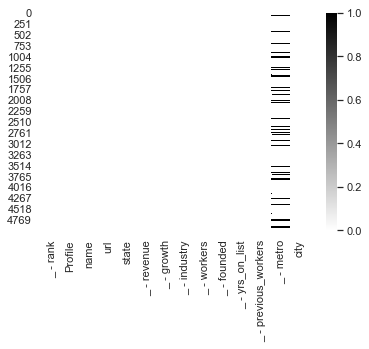

In [7]:
# Heatmap and list of null values
sns.heatmap(df.isnull(), cmap = 'binary');
print(df.isnull().sum())

So far, the dataset looks fairly clean and with not so many null values, except for the metro column that we are going to drop since its sort of similar to the city column.

***

**Data Wrangling**

First we are going to clean the column names by removing the `_-` from the beginning of each column name:

In [8]:
# Remove "_ - " from column names
new_labels = []
for col in df.columns:
    if '_ - ' in col:
        new_labels.append(col[4:])  # exclude last 6 characters
    else:
        new_labels.append(col)

# New labels for our columns
new_labels

['rank',
 'Profile',
 'name',
 'url',
 'state',
 'revenue',
 'growth',
 'industry',
 'workers',
 'founded',
 'yrs_on_list',
 'previous_workers',
 'metro',
 'city']

In [9]:
# Changing old columns for new ones in the df
df.columns = new_labels

In [10]:
# Dropping the unnecessary columns for the analysis 
df.drop(['Profile','metro','url','yrs_on_list'], axis=1, inplace=True)

In [11]:
# Checking the new df 
df.head(6)

,rank,name,state,revenue,growth,industry,workers,founded,previous_workers,city
0,1,Freestar,AZ,36.9 Million,36680.3882,Advertising & Marketing,40.0,2015,5,Phoenix
1,2,FreightWise,TN,33.6 Million,30547.9317,Logistics & Transportation,39.0,2015,8,Brentwood
2,3,Cece's Veggie Co.,TX,24.9 Million,23880.4852,Food & Beverage,190.0,2015,10,Austin
3,4,LadyBoss,NM,32.4 Million,21849.8925,Consumer Products & Services,57.0,2014,2,Albuquerque
4,5,Perpay,PA,22.5 Million,18166.4070,Retail,25.0,2014,6,Philadelphia
5,6,Cano Health,FL,271.8 Million,14183.4118,Health,742.0,2009,18,Miami


_Note_

One of the concerns when I first check the original Inc. 5000 Most Succesful Companies on 2019 dataset on their [website](https://www.inc.com/inc5000/2019/top-private-companies-2019-inc5000.html) was that most of the `revenue` column has companies with millions of dollars on revenue, but there are 23 companies that had revenue in billions of dollar, so what I did was separate them in two variables so once I remove de `Million`, `Billion` string from the values I can either multiply by _1000000_ in the case of the million dollar companies or by _1000000000_ for the billion dollar companies.

In [12]:
# Locate the billion dollar companies
billion_vals = df['revenue'].str.contains('Billion')
print('Number of companies that made at least a billion:',len(df[billion_vals]),'\n')
# Locate the million dollar companies
million_vals = df['revenue'].str.contains('Million')
print('Number of companies that made millions:',len(df[million_vals]))

Number of companies that made at least a billion: 23 

Number of companies that made millions: 4989


In [13]:
# Checking we aren't skipping any company that made less that a million or a trillion
df.shape[0] == (len(df[billion_vals]) + len(df[million_vals]))

True

In [14]:
# Removing million-billion string from the numbers
df['revenue'] = [x.strip('Million') for x in df.revenue]
df['revenue'] = [x.strip('Billion') for x in df.revenue]

In [15]:
# Changing strings to floats
df['revenue'] = df['revenue'].astype(float)

In [16]:
# Checking for those companies who made the big bucks
df[billion_vals]

,rank,name,state,revenue,growth,industry,workers,founded,previous_workers,city
605,605,Chewy,FL,3.5,735.5436,Retail,9833.0,2011,9833,Dania Beach
914,913,Uber Technologies,CA,11.3,464.9123,Consumer Products & Services,22263.0,2009,22263,San Francisco
1076,1073,Prime Therapeutics,MN,21.4,390.5654,Health,3300.0,1998,3900,Eagan
1621,1617,Allied Universal,CA,5.8,255.1902,Security,155000.0,1957,36469,Santa Ana
2602,2594,Epiq,GA,1.0,150.7917,Business Products & Services,5800.0,1998,4908,Atlanta
2664,2656,Fortis Construction,OR,1.2,146.4234,Construction,330.0,2003,180,Portland
2730,2722,Kodiak Building Partners,CO,1.1,141.2369,Construction,2397.0,2011,958,Highlands Ranch
2793,2785,Strike,TX,1.7,135.6522,Energy,6941.0,2003,3715,Spring
3278,3270,Victra,NC,1.5,110.7096,Retail,5000.0,1996,4500,Raleigh
3605,3596,Transportation Insight,NC,2.3,97.2672,Logistics & Transportation,486.0,1999,378,Hickory


The next code lines will multiply de million values by 1000000 and the billion values by 1000000000 but for simplicity we are only going to leave them as is.

In [17]:
# Multiplying millionaire companies by 1000000
#df.loc[millionaires, 'revenue'] = df.apply(lambda row: row['revenue'] * 1000000, axis=1)
# Multiplying billionaire companies by 1000000000
#df.loc[billionaires, 'revenue'] = df.apply(lambda row: row['revenue'] * 1000000000, axis=1)

We are going to divide the dataset in two, the millionaires and the billionaires, just for the sake of a fair comparison.

In [18]:
# Making a copy if the original df
millionaires = df[million_vals].copy()
billionaires = df[billion_vals].copy()

In [19]:
print(millionaires.shape[0])
print(billionaires.shape[0])

4989
23


In [20]:
# For purposes of better readability, let's round the growth column to one decimal.
millionaires['growth'] = millionaires['growth'].round(1)
billionaires['growth'] = billionaires['growth'].round(1)

In [21]:
millionaires.head()

,rank,name,state,revenue,growth,industry,workers,founded,previous_workers,city
0,1,Freestar,AZ,36.9,36680.4,Advertising & Marketing,40.0,2015,5,Phoenix
1,2,FreightWise,TN,33.6,30547.9,Logistics & Transportation,39.0,2015,8,Brentwood
2,3,Cece's Veggie Co.,TX,24.9,23880.5,Food & Beverage,190.0,2015,10,Austin
3,4,LadyBoss,NM,32.4,21849.9,Consumer Products & Services,57.0,2014,2,Albuquerque
4,5,Perpay,PA,22.5,18166.4,Retail,25.0,2014,6,Philadelphia


In [22]:
billionaires.head()

,rank,name,state,revenue,growth,industry,workers,founded,previous_workers,city
605,605,Chewy,FL,3.5,735.5,Retail,9833.0,2011,9833,Dania Beach
914,913,Uber Technologies,CA,11.3,464.9,Consumer Products & Services,22263.0,2009,22263,San Francisco
1076,1073,Prime Therapeutics,MN,21.4,390.6,Health,3300.0,1998,3900,Eagan
1621,1617,Allied Universal,CA,5.8,255.2,Security,155000.0,1957,36469,Santa Ana
2602,2594,Epiq,GA,1.0,150.8,Business Products & Services,5800.0,1998,4908,Atlanta


In [23]:
# Replacing the workers value of that company with their previous_workers value -> 20
millionaires['workers'].fillna(20, inplace = True)

In [24]:
# Checking for null values on millionaires 
millionaires.isnull().sum()

rank                0
name                0
state               0
revenue             0
growth              0
industry            0
workers             0
founded             0
previous_workers    0
city                0
dtype: int64

In [25]:
# Checking for null values on billionaires 
billionaires.isnull().sum()

rank                0
name                0
state               0
revenue             0
growth              0
industry            0
workers             0
founded             0
previous_workers    0
city                0
dtype: int64

***

**Visual Analysis for the millionaire companies**

First, let's check the number of companies by industry in the dataset

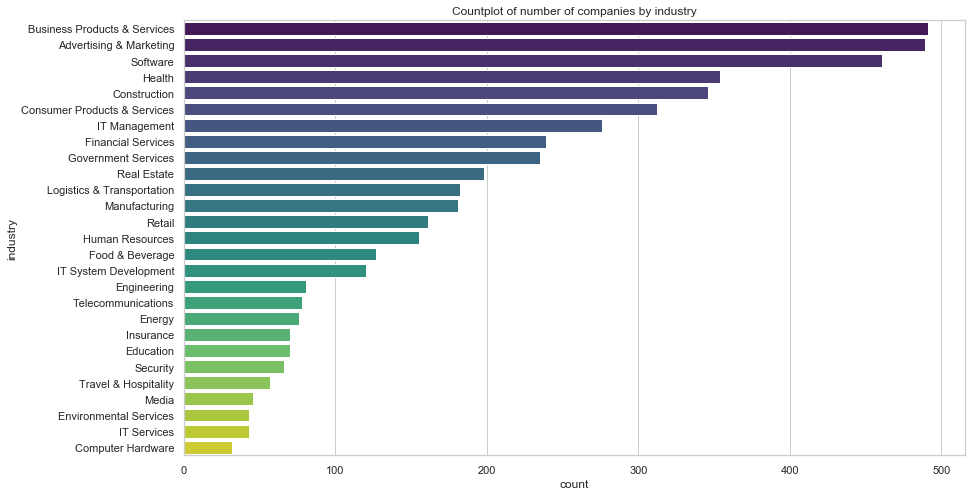

In [53]:
# Plot number of companies by industry
plt.figure(figsize=(14, 8))
plt.title('Countplot of number of companies by industry')
plt.xlabel('xlabel', fontsize=12)
plt.ylabel('ylabel', fontsize=12)
sns.countplot(y=millionaires['industry'], palette='viridis',order = millionaires['industry'].value_counts().index);

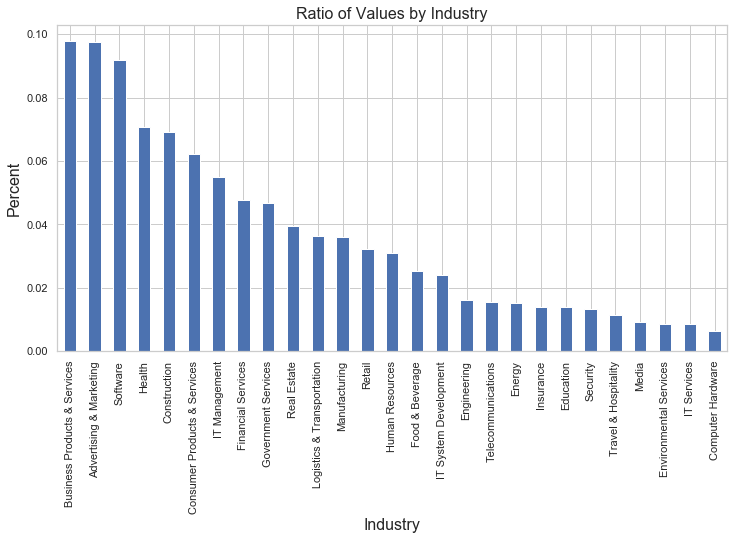

In [27]:
# Percent of the industry values in the dataset
plt.figure(figsize=(12, 6))
count_vals = millionaires['industry'].value_counts()
(count_vals/df.shape[0]).plot(kind='bar')
plt.title('Ratio of Values by Industry', fontsize=16)
plt.xlabel('Industry', fontsize=16)
plt.ylabel('Percent', fontsize=16);

In [28]:
# Checking for where most of the data is located
count_vals = millionaires['industry'].value_counts()
print('These 16 industries, represent:', 100*(count_vals[:16]/millionaires.shape[0]).sum()\
      ,'percent of the values in the dataset:\n')
print(count_vals[:16])

These 16 industries, represent: 86.73080777710965 percent of the values in the dataset:

Business Products & Services    491
Advertising & Marketing         489
Software                        461
Health                          354
Construction                    346
Consumer Products & Services    312
IT Management                   276
Financial Services              239
Government Services             235
Real Estate                     198
Logistics & Transportation      182
Manufacturing                   181
Retail                          161
Human Resources                 155
Food & Beverage                 127
IT System Development           120
Name: industry, dtype: int64


As we can see, 87% of the data belongs to these 16 industries, now let's check the distribution of the States with their proportions.

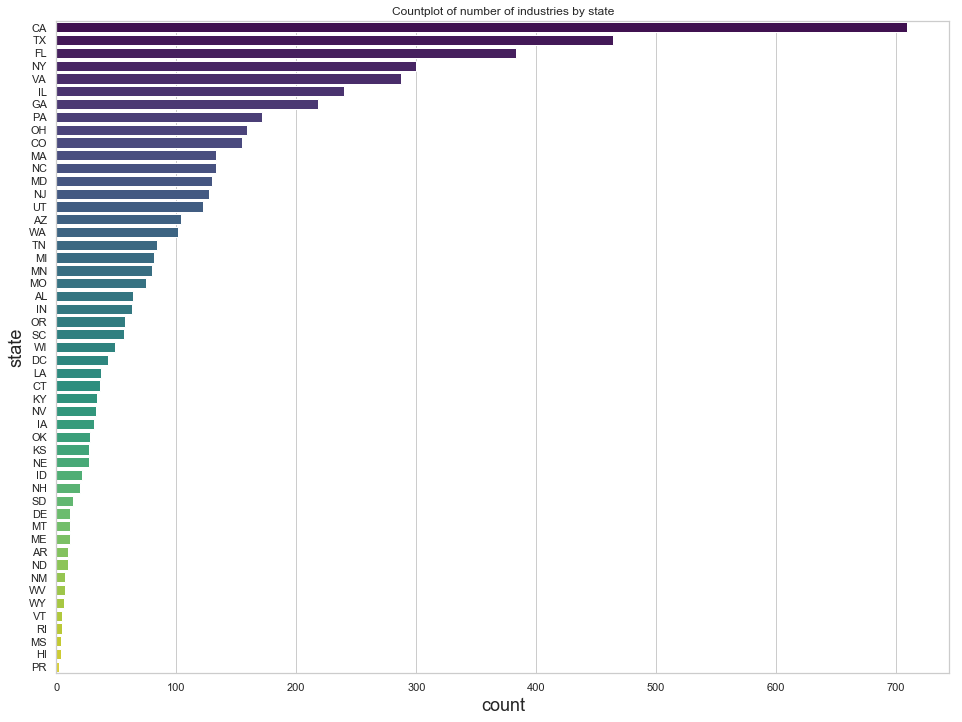

In [29]:
# Countplot industry by state
plt.figure(figsize=(16, 12))
plt.title('Countplot of number of industries by state')
plt.xlabel('xlabel', fontsize=18)
plt.ylabel('ylabel', fontsize=18)
sns.countplot(y=millionaires['state'], palette='viridis',order = millionaires['state'].value_counts().index);

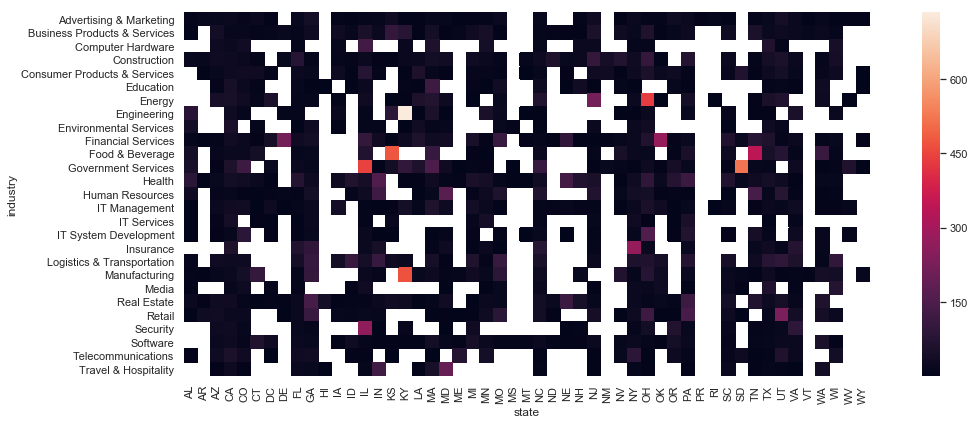

In [30]:
# Heatmap visualization of number of type of companies by state
plt.figure(figsize=(16, 6))
piv = millionaires.pivot_table(values='revenue',index='industry',columns='state')
ax = sns.heatmap(piv, square=True)
plt.setp(ax.xaxis.get_majorticklabels(), rotation=90)
plt.tight_layout()
plt.show()

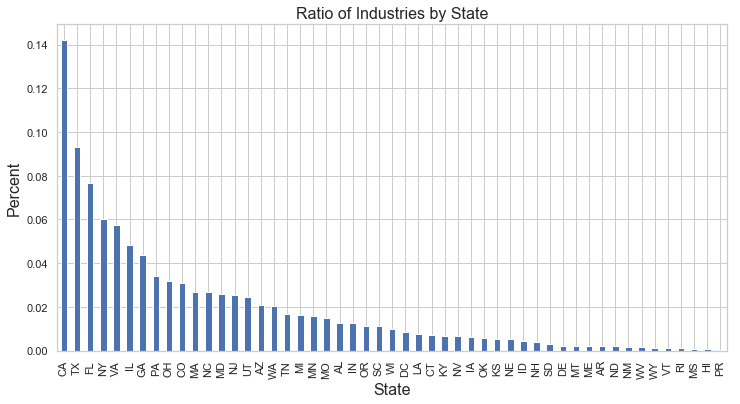

In [31]:
# Percent of the industry values in the dataset
plt.figure(figsize=(12, 6))
count_vals_st = millionaires['state'].value_counts()
(count_vals_st/millionaires.shape[0]).plot(kind='bar')
plt.title('Ratio of Industries by State', fontsize=16)
plt.xlabel('State', fontsize=16)
plt.ylabel('Percent', fontsize=16);

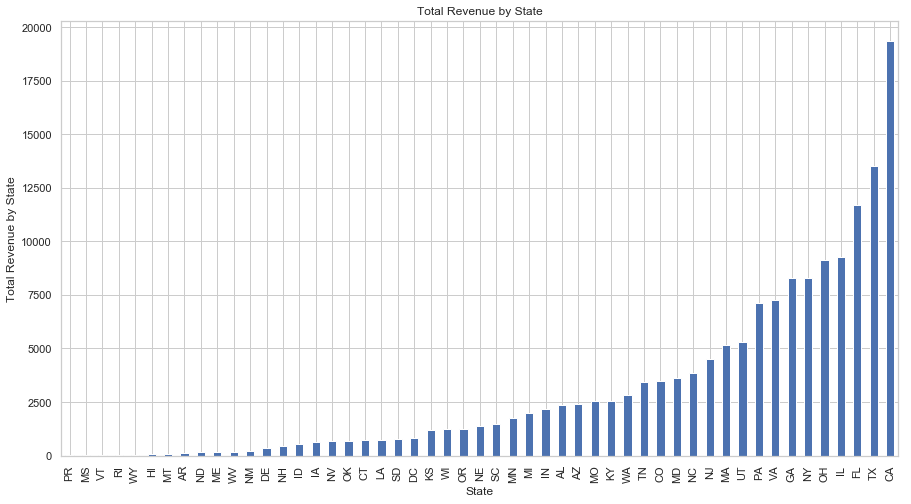

In [58]:
revenue_by_state = millionaires.groupby('state')['revenue'].sum()
revenue_by_state.sort_values(inplace=True)
# Plot bar
revenue_by_state.plot.bar(figsize=(15,8))
plt.title('Total Revenue by State')
plt.xlabel('State')
plt.ylabel('Total Revenue by State')

plt.show();

Let's graph the same distributions but now with the cities

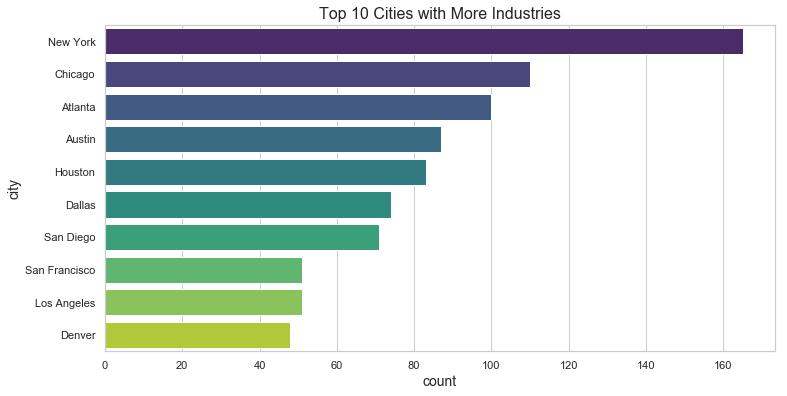

In [32]:
# Getting the top 10 cities
count_vals_ct = millionaires['city'].value_counts()
plt.figure(figsize=(12, 6))
plt.title('Top 10 Cities with More Industries', fontsize=16)
plt.xlabel('xlabel', fontsize=14)
plt.ylabel('ylabel', fontsize=14)
sns.countplot(y=millionaires['city'], palette='viridis',order = count_vals_ct[:10].index);

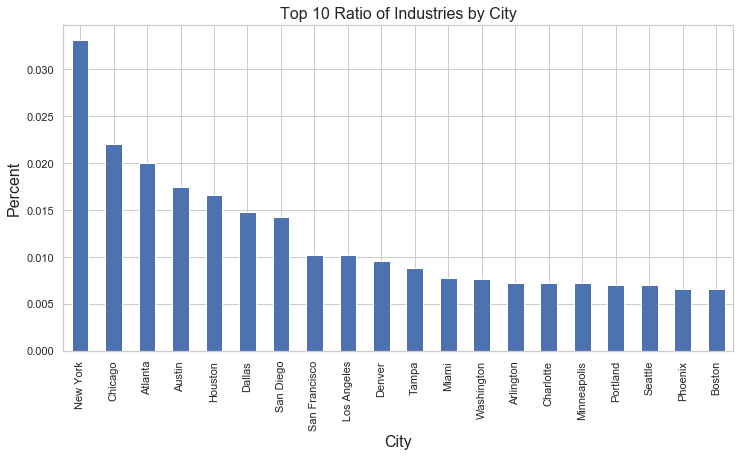

In [33]:
# Percent of the industry values in the dataset
count_vals_ct = millionaires['city'].value_counts()
plt.figure(figsize=(12, 6))
(count_vals_ct[:20]/millionaires.shape[0]).plot(kind='bar')
plt.title('Top 10 Ratio of Industries by City', fontsize=16)
plt.xlabel('City', fontsize=16)
plt.ylabel('Percent', fontsize=16);

Now let's get some visuals of the total revenue by industry

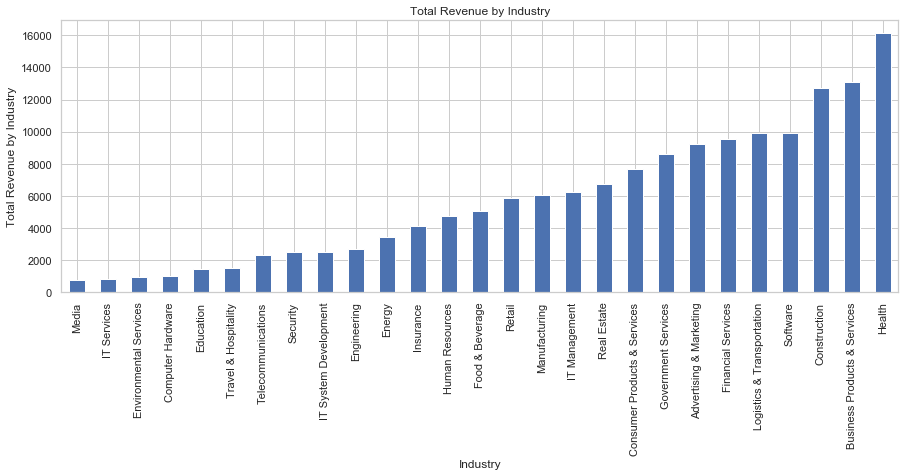

In [54]:
# Grouping by the total sum of revenue by industry
revenue_by_industry = millionaires.groupby('industry')['revenue'].sum()
revenue_by_industry.sort_values(inplace=True)
# Plot bar
revenue_by_industry.plot.bar(figsize=(15,5))
plt.title('Total Revenue by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Revenue by Industry')

plt.show();

Now let's get the visuals for the growth by industry

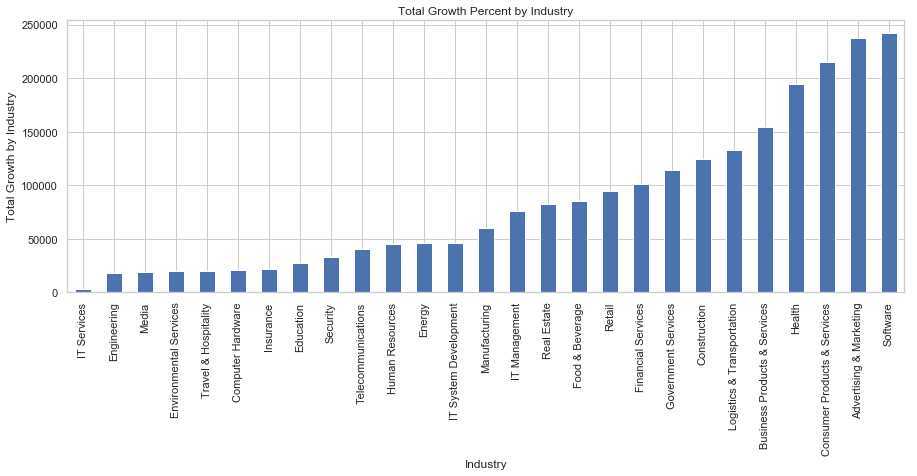

In [62]:
# Grouping by the total sum of growth by industry
growth_by_industry = millionaires.groupby('industry')['growth'].sum()
growth_by_industry.sort_values(inplace=True)
# Plot bar
growth_by_industry.plot.bar(figsize=(15,5))
plt.title('Total Growth Percent by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Growth by Industry')

plt.show();

As we can see, the industry who made more money in total (sum of all the revenue by industry) was `Health` but that doesn't necessarily mean they have the most `growth` in general. For example in the Revenue Chart vs Growth Chart, `Software` and `Health` trade places for 1 to 4. 

The fact that some industries have more revenue and growth also depend and how many counts that type of industry has on the dataset. This dataset is highly biased towards 3 industries with close to 500 counts each of them.

- Business Products & Services
- Ads & Mkt
- Software

It's interesting to see an industry like `Health` which if we compare to the three above, it only has 350 counts but still has the #1 in `revenue` by a good margin.

Now, if we look them by company, we have 4 'winners':

In [36]:
# Company with most revenue
print('Most valued millionaire company : '+ str(millionaires.loc[millionaires['revenue'].idxmax()][1]))
# Company with the most growth
print('Most percentage growth by a millionaire company : '+ str(millionaires.loc[millionaires['growth'].idxmax()][1]))
print('')
# Company with most revenue
print('Most valued billionaire company : '+ str(billionaires.loc[billionaires['revenue'].idxmax()][1]))
# Company with the most growth
print('Most percentage growth by a billionaire company : '+ str(billionaires.loc[billionaires['growth'].idxmax()][1]))

Most valued millionaire company : Convergint Technologies
Most percentage growth by a millionaire company : Freestar

Most valued billionaire company : Prime Therapeutics
Most percentage growth by a billionaire company : Chewy


Most of the companies in the dataset are "young" companies, mostly from the 2000's 

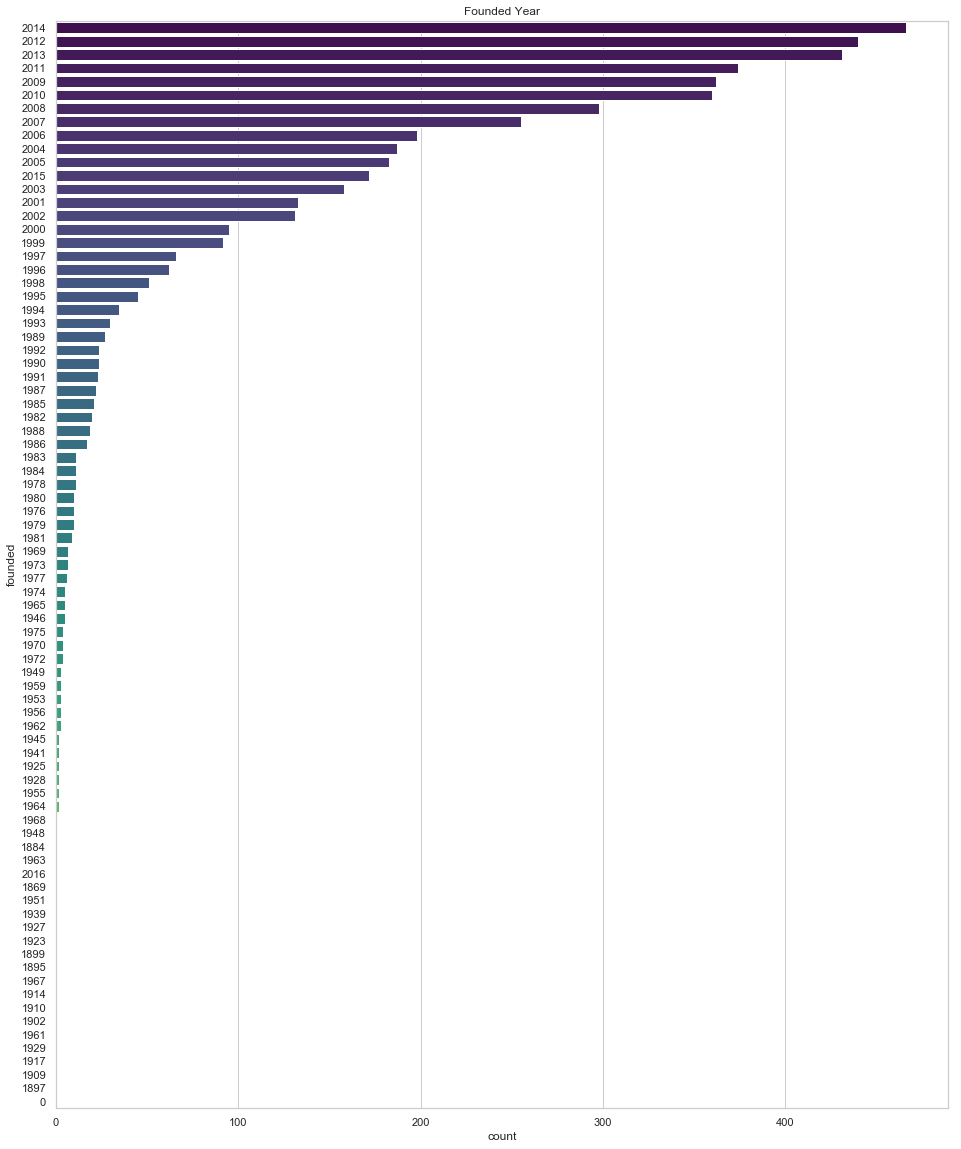

In [72]:
plt.figure(figsize=(16, 20))
plt.title('Founded Year')
sns.countplot(y=millionaires.founded,palette='viridis',order =millionaires.founded.value_counts() .index);

***

Now let's check for any type of correlation between variables

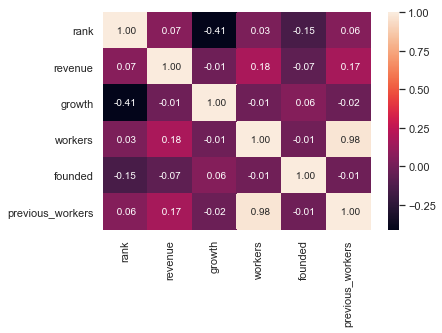

In [38]:
# Heatmap of the corr with annotations
sns.heatmap(millionaires.corr(), annot=True, fmt=' .2f')

It looks like there is a slight correlation between the number of `employees` and `revenue` but there is some sort of negative impact between `workers` and `growth`. The variable that is correlated the most (in a negative way) to `growth` is `rank` which makes since the metric Inc Magazine used to rank the companies was by growth_percent, so if the company had little growth, the company will have a lower ranking than those who had better growth.

***

### Conclusions:

Besides that the dataset has many ups and downs in terms of different revenue, size of company and growth, we were able to identify the key questions we had in mind when we started this project.

The main 3 questions for the analysis were:

1. Which is the hottest industry in 2019 (according to the dataset).
2. What city/state showed most of the industry growth.
3. From what type of companies does growth increased the most.

 -  For the first question, after breaking down the revenue by state and industry, we can conclude that the hottest industry right now for investment is the Health industry, on top of having less values than the Software and Ads & MKT industry, it still came on top of those 2.
 - In terms of state, California is the one with most companies followed by Texas and Florida. Even when California was the state with most traffic, it was New York City the city with most companies.
 - Software companies are growing very fast, we can see that in cities like San Francisco, Seattle ew York just to mention a few, it is important for software and online-services companies not only to zero in on their main priorities but also to be prepared to reevaluate products and processes as they grow. We can see a reflection of that in this dataset. Eventhough Software was number 4 in total revenue, it was first place in the growth chart.
 
So after the analysis we can conclude that according to the values seen here, if you were to invest some money, you probably should do it in a company on the health / software / ads & mkt in a place like California or Texas. But if you are looking for an specific point, New York City is the place to start.